In [1]:
def rungaFourth(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,v0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    vpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, vpoints

In [2]:
# grav
def f(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81 
    return np.array([fy, fv], float)

In [3]:
def x_straight(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = 0
    return np.array([fy, fv], float)

In [4]:
def x_lin(r,t):
    c = 0.3
    y = r[0]
    v = r[1]
    fy = v
    fv = -c*v
    return np.array([fy, fv], float)

In [5]:
def y_lin(r,t):
    c = 0.3
    g = -9.81
    y = r[0]
    v = r[1]
    fy = v
    fv = g-c*v
    return np.array([fy, fv], float)

In [6]:
def z_lin(r,t):
    c = 0.3
    y = r[0]
    v = r[1]
    fy = v
    fv = -c*v
    return np.array([fy, fv], float)

0.0 -0.11819405806549665 21.770557727137003


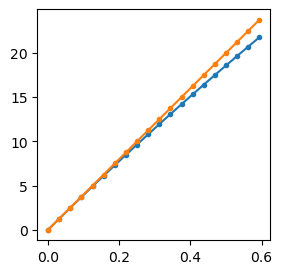

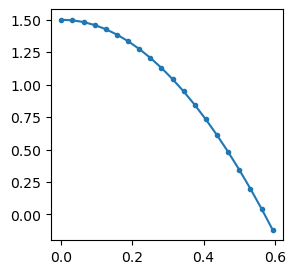

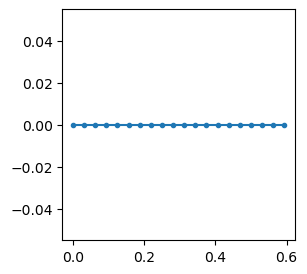

In [7]:
t,z,zv = rungaFourth(x_lin, x0=0, v0=40, tf=.6)
st,sz,sxz = rungaFourth(x_straight, x0=0, v0=40, tf=.6)
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.plot(t,z,".-")
ax1.plot(t,sz,".-")

t,y,yv = rungaFourth(y_lin, x0=1.5, tf=.6)
fig0, ax0 = plt.subplots(figsize=(3,3))
ax0.plot(t,y,".-")

t,x,xv = rungaFourth(z_lin, v0=0, tf=.6)
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(t,x,".-")

print(x[-1], y[-1], z[-1])

Text(0, 0.5, 'Height (M)')

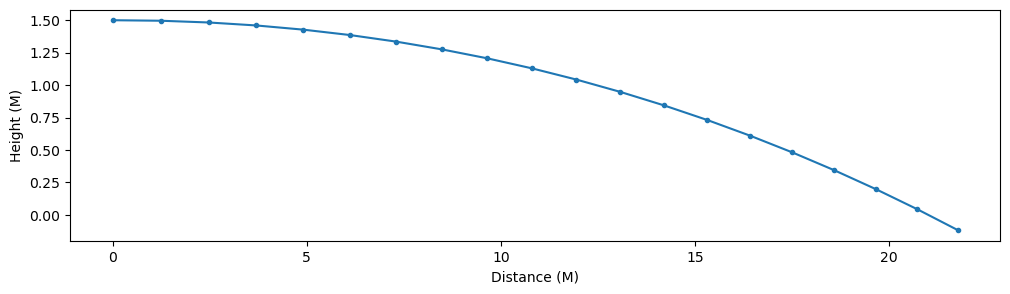

In [8]:
# y over x
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(z,y,".-")
ax2.set_xlabel("Distance (M)")
ax2.set_ylabel("Height (M)")

Text(0.5, 0, 'Z-axis')

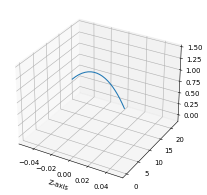

In [12]:
fig3 = plt.figure(dpi=50)
ax3 = fig3.add_subplot(projection='3d')
ax3.plot(0*t,z,y)
ax3.set_xlabel('Z-axis')

In [14]:
import csv

print(z)

row = []
with open('D:\pro_dev\BaseballPitchVisual\Assets\data.csv', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)

    for i in range(len(x)):
        row = [z[i]-8,y[i]+1,x[i]-8]
        write.writerow(row)


[0.0, 1.245130898952484, 2.4786341657385216, 3.700618384788803, 4.911191126520296, 6.1104589568055925, 7.298527446353829, 8.475501180004004, 9.641483765931504, 10.796577844768663, 11.940885098640143, 13.07450626011394, 14.197541121068808, 15.310088541478857, 16.412246458116137, 17.50411189317194, 18.5857809627976, 19.65734888556552, 20.718909990851202, 21.770557727137003]


In [20]:
Xc0=54.30401
Xc1=-132.6675
Xc2=16.49743
Yc0=6.27917
Yc1=-4.53417
Yc2=-7.10428


In [21]:
t = np.linspace(0,1,50)

In [24]:
x = Xc0 + Xc1*t + Xc2*np.power(t,2)
y = Yc0 + Yc1*t + Yc2*np.power(t,2)

Text(0, 0.5, 'Height (M)')

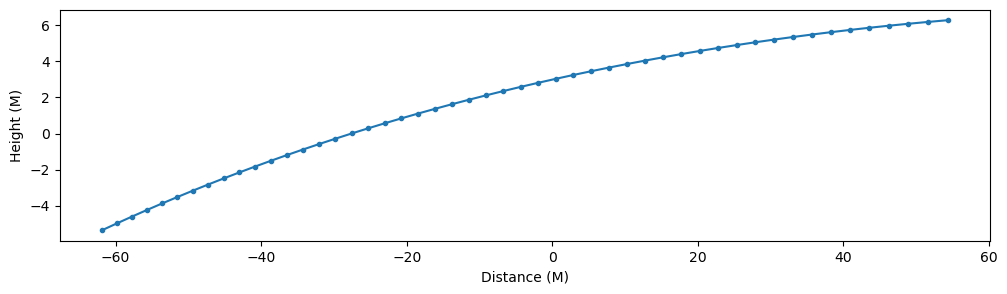

In [25]:
# y over x
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(x,y,".-")
ax2.set_xlabel("Distance (M)")
ax2.set_ylabel("Height (M)")